## Emotional Recognition Model for Final Project

In [96]:
pip install pandas Pillow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\python310\lib\site-packages (1.4.2)



In [97]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [2]:
emotional_categories = [
    'ANGER',
    'DISGUST',
    'FEAR',
    'HAPPINESS',
    'NEUTRAL',
    'SADNESS',
    'SURPRISE'
]

In [3]:
import os
from PIL import Image
import pandas as pd

# Replace 'path_to_root_folder' with the actual path to your root folder containing 'train' and 'val'
root_folder = 'E:\OneDrive\OneDrive - Personal\OneDrive\Studies\CM3070 - Final Project\Data'
train_folder = os.path.join(root_folder, 'train')
val_folder = os.path.join(root_folder, 'val')


def extract_pixels(image_path):
    with Image.open(image_path) as img:
        pixels = list(img.getdata())
    return pixels

def process_images(emotion_folder, dataset_type):
    data = []
    for emotion in emotional_categories:
        emotion_folder_path = os.path.join(emotion_folder, emotion)
        for image_name in os.listdir(emotion_folder_path):
            image_path = os.path.join(emotion_folder_path, image_name)
            pixels = extract_pixels(image_path)
            data.append({
                'Emotion': emotion,
                'Pixels': pixels,
                'Dataset Type': dataset_type,
            })
    return data

train_data = process_images(train_folder, 'Training Set')
val_data = process_images(val_folder, 'Validation Set')

# Convert data to DataFrame and write to Excel
df_train = pd.DataFrame(train_data)
df_val = pd.DataFrame(val_data)

with pd.ExcelWriter('emotions_pixels.xlsx') as writer:
    df_train.to_excel(writer, sheet_name='Training Set', index=False)
    df_val.to_excel(writer, sheet_name='Validation Set', index=False)

In [4]:
#Install all packages

#if facing a issue with installing tensor then run: pip install --upgrade pip setuptools
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install plotly
!pip install tensorflow

In [5]:
#Import all the libraries to be used. 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

#Enable multiple outputs to be displayed in jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# It sets the random seed for NumPy to 42 using the np.random.seed(42) command. 
# This means that any random processes that depend on NumPy (such as the random initialization of weights in a neural network) 
# will produce the same results each time the script is run.
tf.random.set_seed(42)

In [6]:
#import the data to be used for deep learning
import pandas as pd


# Read the "Training Set" sheet from the Excel file
train_data = pd.read_excel("emotions_pixels.xlsx", sheet_name="Training Set")

# Read the "Validation Set" sheet from the Excel file
val_data = pd.read_excel("emotions_pixels.xlsx", sheet_name="Validation Set")


# Now you can work with the data from the "Training Set" sheet
print(train_data.head())  # Display the first few rows of the DataFrame

# Now you can work with the data from the "Validation Set" sheet
print(val_data.head())  # Display the first few rows of the DataFrame

# Concatenate the two DataFrames
data = pd.concat([train_data, val_data], ignore_index=True)


  Emotion                                             Pixels  Dataset Type
0   ANGER  [72, 78, 81, 75, 59, 54, 63, 61, 55, 55, 62, 4...  Training Set
1   ANGER  [152, 149, 147, 157, 146, 133, 114, 138, 170, ...  Training Set
2   ANGER  [29, 25, 21, 23, 26, 24, 49, 67, 85, 101, 121,...  Training Set
3   ANGER  [32, 23, 20, 56, 43, 34, 38, 46, 92, 99, 34, 2...  Training Set
4   ANGER  [222, 218, 202, 189, 199, 208, 193, 134, 103, ...  Training Set
  Emotion                                             Pixels    Dataset Type
0   ANGER  [238, 239, 237, 234, 232, 228, 231, 203, 170, ...  Validation Set
1   ANGER  [93, 93, 91, 92, 90, 94, 78, 75, 147, 104, 81,...  Validation Set
2   ANGER  [251, 248, 255, 224, 33, 54, 151, 188, 198, 19...  Validation Set
3   ANGER  [5, 11, 9, 11, 14, 13, 15, 1, 26, 34, 35, 19, ...  Validation Set
4   ANGER  [34, 31, 28, 24, 26, 19, 21, 6, 16, 77, 106, 1...  Validation Set


,Emotion,Pixels,Dataset Type
0,ANGER,"[72, 78, 81, 75, 59, 54, 63, 61, 55, 55, 62, 4...",Training Set
1,ANGER,"[152, 149, 147, 157, 146, 133, 114, 138, 170, ...",Training Set
2,ANGER,"[29, 25, 21, 23, 26, 24, 49, 67, 85, 101, 121,...",Training Set
3,ANGER,"[32, 23, 20, 56, 43, 34, 38, 46, 92, 99, 34, 2...",Training Set
4,ANGER,"[222, 218, 202, 189, 199, 208, 193, 134, 103, ...",Training Set


,Emotion,Pixels,Dataset Type
count,38194,38194,38194
unique,7,36240,2
top,HAPPINESS,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Training Set
freq,8989,12,30552


array(['Training Set', 'Validation Set'], dtype=object)

Training Set      30552
Validation Set     7642
Name: Dataset Type, dtype: int64

<AxesSubplot:>

Text(0.5, 1.0, 'Count Distribution')

<AxesSubplot:>

Text(0.5, 1.0, 'Percentage Distribution')

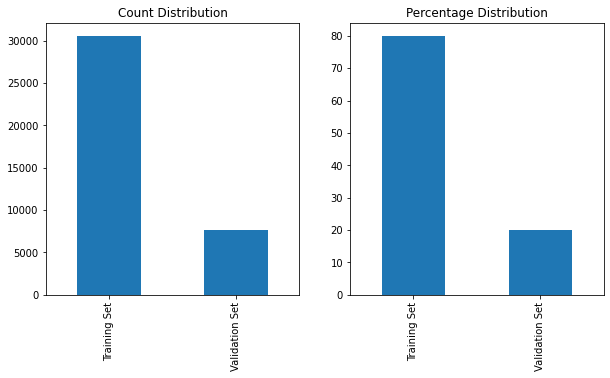

In [7]:
#Show some records from the imported dataset
data.head()
data.describe()

#Get the Uasge of the Data in the full Dataset...
data["Dataset Type"].unique()

#Counts of the Uasage sets of data elements
counts = data["Dataset Type"].value_counts()

counts

# Get the percentage distribution of the column
percentages = counts / counts.sum() * 100

# Create a bar plot of the count and percentage distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

counts.plot(kind="bar", ax=ax[0])
ax[0].set_title("Count Distribution")

percentages.plot(kind="bar", ax=ax[1])
ax[1].set_title("Percentage Distribution")

plt.show()

#I will be using the validation set to make the training test split 80/20

In [8]:
def plot(x, y, type='scatter', title="title", xlabel="x", ylabel="y"):
    """
    Creates a plot using Plotly based on the given x and y values.

    Parameters:
    x (list): The x values for the plot.
    y (list): The y values for the plot.
    type (str): The type of plot to create. Must be either 'scatter' or 'bar'.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.

    Returns:
    None
    """
    if type == 'scatter':
        data = go.Scatter(x=x, y=y)
    elif type == 'bar':
        data = go.Bar(x=x, y=y)

    layout = go.Layout(title=title, xaxis=dict(title=xlabel), yaxis=dict(title=ylabel))
    fig = go.Figure(data=[data], layout=layout)
    iplot(fig)

In [9]:
# Displat the images nice without the interim outputs of python 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

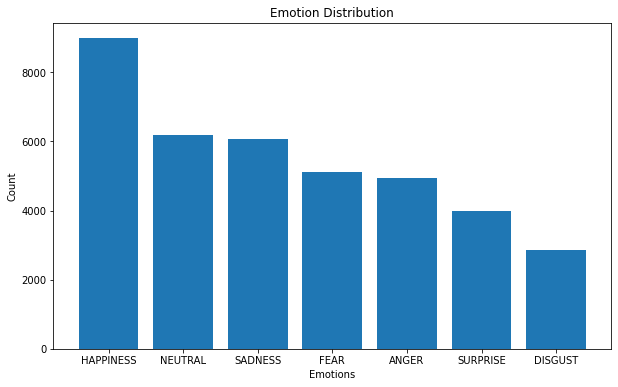

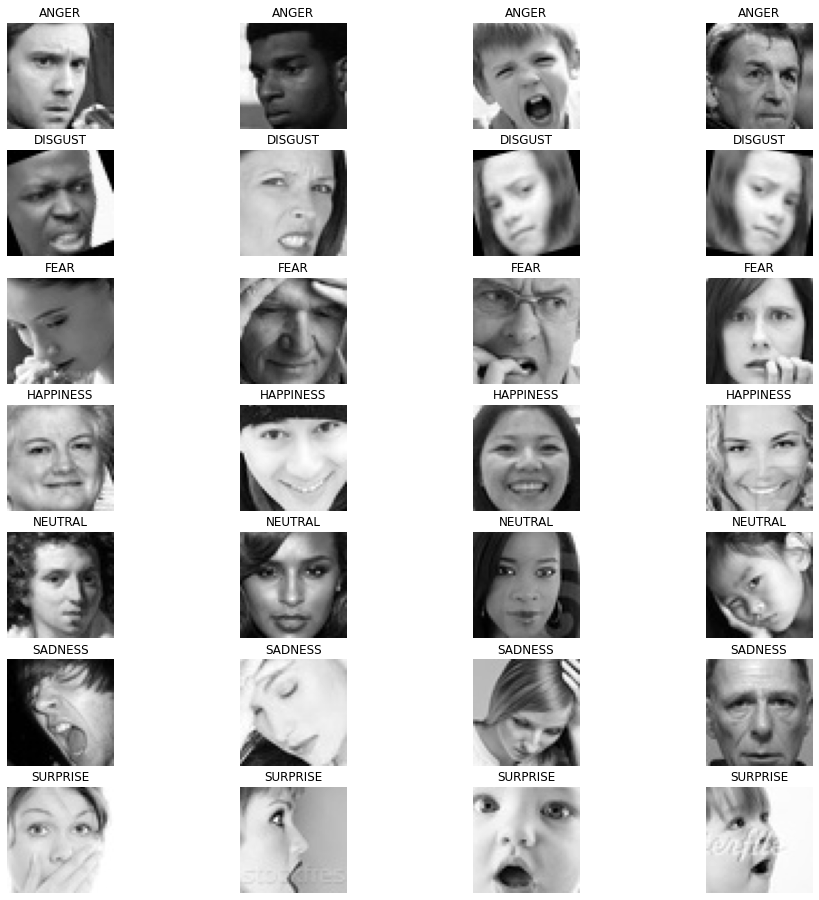

In [10]:
# Map emotions to values using the predefined dictionary
emotional_weights = {
'ANGER': -3, 
'DISGUST': -2,
'FEAR': -1,
'HAPPINESS': 3, 
'NEUTRAL': 0,
'SADNESS': -2, 
'SURPRISE': 2
}

meta_df = data.rename(columns={"Emotion":"label","Pixels":"image"})

# Apply the emotional_weights mapping to create the 'emotion_value' column
meta_df['emotion_value_weight'] = meta_df['label'].map(emotional_weights)
meta_df['emotion_value'] = meta_df['label']

meta_df
# Convert the 'image' column from strings to lists of integers
meta_df['image'] = meta_df['image'].apply(lambda x: [int(val) for val in x.strip('[]').split(',')])

# Visualize Emotions Distribution
plt.figure(figsize=(10, 6))
emotion_counts = meta_df['label'].value_counts()
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Emotion Distribution')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

# Check data for each emotion nd display
meta_df

# Group the DataFrame by category and sort the values within each group
grouped = meta_df.groupby('label').apply(lambda x: x.sort_values('label', ascending=False))

# Reset the index of the grouped DataFrame
grouped = grouped.reset_index(drop=True)

# Get the top 4 items for each category
top_4 = grouped.groupby('label').head(4)

# Create a figure and axes for the grid of images
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 16))

# Iterate through the top 4 items for each category and plot the images in the grid
for i, (index, row) in enumerate(top_4.iterrows()):
    img = np.reshape(np.array(row['image']), (48, 48))
    ax = axes[i // 4, i % 4]
    ax.imshow(img, cmap='gray')
    ax.set_title(row['label'])
    ax.axis('off')
    
# Show the plot
plt.show()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
meta_df['emotion_value']

0           ANGER
1           ANGER
2           ANGER
3           ANGER
4           ANGER
           ...   
38189    SURPRISE
38190    SURPRISE
38191    SURPRISE
38192    SURPRISE
38193    SURPRISE
Name: emotion_value, Length: 38194, dtype: object

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras

# Separate the features and labels
X = meta_df['image']

# Convert the list of lists into a NumPy array
X = np.array(X.tolist(), dtype="float32")

# Reshape the features into 48 x 48 grayscale images
X = X.reshape(-1, 48, 48, 1)

# Create a label encoder
label_encoder = LabelEncoder()
# Encode the emotion labels
meta_df['emotion_value_encoded'] = label_encoder.fit_transform(meta_df['emotion_value'])

# Encode the emotion labels as one-hot vectors
y = keras.utils.to_categorical(meta_df['emotion_value_encoded'], num_classes=7)  # 7 classifications


# # This is used to check the values from the emotion and encoded mapping - test
# mmeta_df.groupby(['emotion_value', 'emotion_value_encoded', 'emotion_value_weight']).size()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


# Define the CNN model architecture
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print model summary for checking
# model.summary()

# print("X_train shape:", X_train.shape)
# print("y_train shape:", y_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_test shape:", y_test.shape)

# # Print a few examples of data and labels
# print("Sample data:", X_train[0])
# print("Sample label:", y_train[0])


# Train the model
history = model.fit(X_train, y_train, epochs=17, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/17
478/478 [==============================] - 46s 94ms/step - loss: 1.8019 - accuracy: 0.3320 - val_loss: 1.5077 - val_accuracy: 0.4207
Epoch 2/17
478/478 [==============================] - 45s 94ms/step - loss: 1.4437 - accuracy: 0.4481 - val_loss: 1.3762 - val_accuracy: 0.4836
Epoch 3/17
478/478 [==============================] - 46s 96ms/step - loss: 1.3235 - accuracy: 0.4974 - val_loss: 1.2215 - val_accuracy: 0.5276
Epoch 4/17
478/478 [==============================] - 45s 95ms/step - loss: 1.2467 - accuracy: 0.5257 - val_loss: 1.2039 - val_accuracy: 0.5400
Epoch 5/17
478/478 [==============================] - 45s 94ms/step - loss: 1.1988 - accuracy: 0.5479 - val_loss: 1.1405 - val_accuracy: 0.5730
Epoch 6/17
478/478 [==============================] - 42s 88ms/step - loss: 1.1510 - accuracy: 0.5661 - val_loss: 1.1713 - val_accuracy: 0.5553
Epoch 7/17
478/478 [==============================] - 44s 93ms/step - loss: 1.1283 - accuracy: 0.5739 - val_loss: 1.1406 - val_accuracy:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Separate the features and labels
X = meta_df['image']

# Convert the list of lists into a NumPy array
X = np.array(X.tolist(), dtype="float32")

# Reshape the features into 48 x 48 grayscale images
X = X.reshape(-1, 48, 48, 1)

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the emotion labels
meta_df['emotion_value_encoded'] = label_encoder.fit_transform(meta_df['emotion_value'])

# Encode the emotion labels as one-hot vectors
y = keras.utils.to_categorical(meta_df['emotion_value_encoded'], num_classes=7)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the CNN model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

# Compile the model with the Adam optimizer and appropriate learning rate
optimizer = Adam(lr=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Implement EarlyStopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model with callbacks
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model and print accuracy and loss
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Epoch 1/100


C:\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



478/478 [==============================] - 47s 95ms/step - loss: 1.8434 - accuracy: 0.3107 - val_loss: 1.5178 - val_accuracy: 0.4177 - lr: 0.0010
Epoch 2/100
478/478 [==============================] - 43s 89ms/step - loss: 1.4797 - accuracy: 0.4339 - val_loss: 1.2970 - val_accuracy: 0.5100 - lr: 0.0010
Epoch 3/100
478/478 [==============================] - 41s 87ms/step - loss: 1.3497 - accuracy: 0.4886 - val_loss: 1.2813 - val_accuracy: 0.5149 - lr: 0.0010
Epoch 4/100
478/478 [==============================] - 44s 91ms/step - loss: 1.2587 - accuracy: 0.5202 - val_loss: 1.2095 - val_accuracy: 0.5369 - lr: 0.0010
Epoch 5/100
478/478 [==============================] - 42s 88ms/step - loss: 1.2041 - accuracy: 0.5418 - val_loss: 1.1991 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 6/100
478/478 [==============================] - 42s 87ms/step - loss: 1.1633 - accuracy: 0.5579 - val_loss: 1.1147 - val_accuracy: 0.5820 - lr: 0.0010
Epoch 7/100
478/478 [==============================] - 43s 90ms/

In [13]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'EmotionModel.pkl')


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\batch_normalization
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_1
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_2
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_3
......vars
.........0
.........1
.........2
.........3
...layers\batch_normalization_4
......vars
.........0
.........1
.........2
.........3
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\dropout_3
......vars
...layers\dropout_4
......vars
...layers\flatten
......vars
...layers\max

['EmotionModel.pkl']

In [15]:
from PIL import Image

img = Image.open("Nada2.png")

img = img.convert('L') # Convert to grayscale
img = img.resize((48, 48)) # Resize to 64x64
img_arr = np.array(img).reshape((1, 48, 48, 1)) / 255.0 # Convert to numpy array and normalize pixel values

predicted_probabilities = model.predict(img_arr)[0]
predicted_index = np.argmax(predicted_probabilities) 
predicted_emotion = emotional_categories[predicted_index]
print(f"The predicted emotion in the image is {predicted_emotion}")

1/1 [==============================] - 0s 23ms/step
The predicted emotion in the image is ANGER


In [132]:
import modelbit
mb = modelbit.login()

In [133]:
# add the model to the registry
mb.add_model("EmotionModel", model)

ModelbitError: Not Authenticated

In [ ]:
# retrieve the model
my_model = mb.get_model("EmotionModel")
